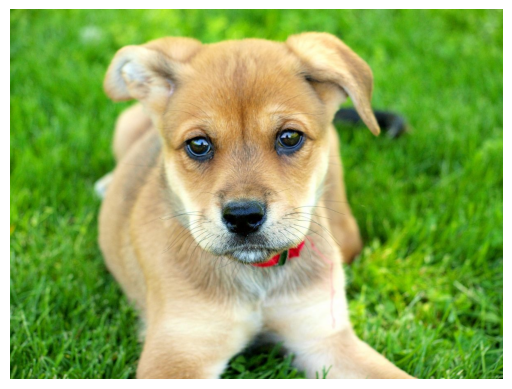

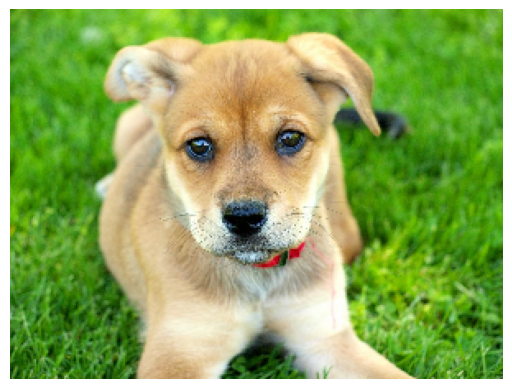

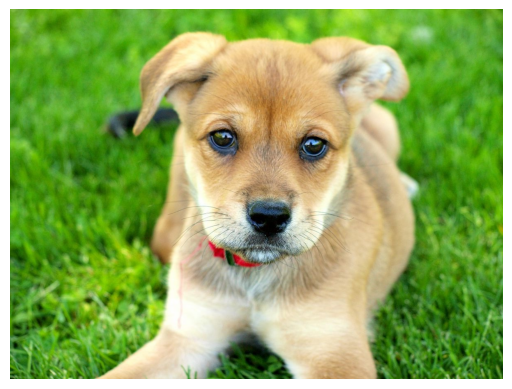

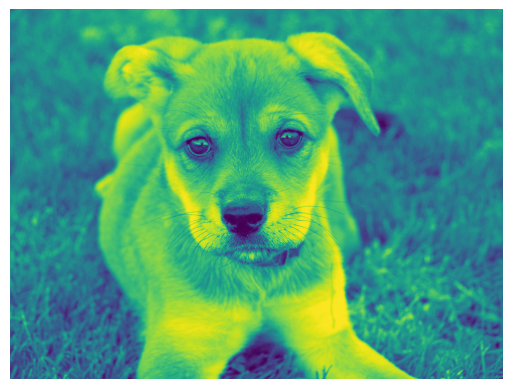

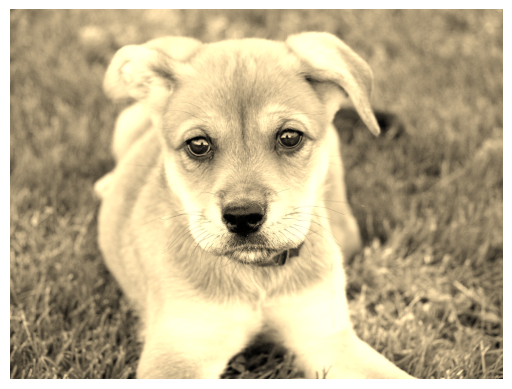

In [1]:
# 导入NumPy库，NumPy是一个支持大量维度数组与矩阵运算的库，此外它也针对数组运算提供了许多数学函数。
import numpy as np

# 从PIL（Python Imaging Library）库中导入Image模块。PIL是一个强大的图像处理库，Pillow是PIL的一个分支和替代品，通常会安装Pillow。
from PIL import Image

# 导入time模块，time模块提供了与时间相关的函数和类。
import time

# 导入matplotlib库中的pyplot模块，并简写为plt
import matplotlib.pyplot as plt

# 定义一个函数，用于显示图像并延时3秒后关闭图像窗口。
def show_and_close_image(image):
    # 使用matplotlib显示图像
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴
    plt.show(block=False)  # 非阻塞显示图像窗口
    # 延时3秒
    plt.pause(3)
    # 关闭matplotlib图像窗口
    plt.close()

# 定义减少图像尺寸的函数
def reduce_image_size_by_n(image, n):
    # 获取图像的高、宽和通道数
    height, width, channels = image.shape
    # 计算缩小后的新高度和新宽度
    new_height = height // n
    new_width = width // n
    # 创建一个新的空数组，用于存储缩小后的图像
    downsampled_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)
    # 遍历新图像的每个像素
    for i in range(new_height):
        for j in range(new_width):
            # 将原图像中的对应像素赋值给新图像
            downsampled_image[i, j] = image[n * i, n * j]
    return downsampled_image

# 定义将图像转换为灰度图像的函数
def grayscale(image):
    # 使用加权公式将彩色图像转换为灰度图像
    grayscale_img = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    # 将结果限制在0到255之间
    grayscale_img = np.clip(grayscale_img, 0, 255)
    # 将图像数据类型转换为8位无符号整数
    grayscale_img = grayscale_img.astype(np.uint8)
    return grayscale_img

# 定义翻转图像的函数
def flip_image(image):
    # 将图像的每一行进行左右翻转
    return image[:, ::-1]

# 定义棕褐色滤镜的函数
def apply_sepia(image):
    # 创建一个用于棕褐色滤镜的转换矩阵
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    # 将原图像应用棕褐色矩阵
    sepia_img = image.dot(sepia_matrix.T)
    # 将结果限制在0到255之间
    sepia_img = np.clip(sepia_img, 0, 255)
    # 将图像数据类型转换为8位无符号整数
    return sepia_img.astype(np.uint8)

# 使用Image模块的open函数打开图像文件，并将其加载到变量img中。
img = Image.open('1.jpg')

# 使用NumPy库中的array函数将PIL图像对象转换为NumPy数组。
image_array = np.array(img)

# 显示原始图片
show_and_close_image(image_array)

# 调用reduce_image_size_by_n函数将图像缩小
reduced_image = reduce_image_size_by_n(image_array, 4)
show_and_close_image(reduced_image)

# 调用flip_image函数将图像水平翻转
flipped_image = flip_image(image_array)
show_and_close_image(flipped_image)

# 调用grayscale函数将图像转换为灰度图像
grayscale_image = grayscale(image_array)
show_and_close_image(grayscale_image)

# 调用apply_sepia函数将图像转换为棕褐色图像
sepia_image = apply_sepia(image_array)
show_and_close_image(sepia_image)

